In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#import multiprocess

In [2]:
#have a way to input a list, to go gather all the summary info for those things --done
#plot all the things for everything in the output from previous file
file1 = '../short_summaries_results/TransPi.tsv'
file2 = '../short_summaries_results/Trinity.tsv'
file_list = '../short_file_list.txt'
TransPi = pd.read_csv(file1, sep='\t', index_col='species_name')
Trinity = pd.read_csv(file2, sep='\t', index_col='species_name')
# print(TransPi)
# print(Trinity)

In [3]:
#Filter to only desired list
filter_list = []
with open(file_list, 'r') as f_list:
    for line in f_list:
        filter_list.append(line.strip())
print(filter_list)
print(TransPi.columns)
print(Trinity.columns)

# TransPi = TransPi.loc[filter_list]
# Trinity = Trinity.loc[filter_list]

print((TransPi['Total'] > 954).any())
print((Trinity['Total'] > 954).any())
TransPi = TransPi.drop(columns=['Total'])

['Acropora_aculeus', 'Acropora_cervicornis', 'Acropora_digitifera', 'Hormiphora_californensis', 'Plakina_jani', 'Erenna_richardi', 'Bargmannia_amoena']
Index(['Complete_BUSCOs', 'Complete_&_single-copy', 'Complete_&_duplicated',
       'Fragmented', 'Missing', 'Total'],
      dtype='object')
Index(['Complete_BUSCOs', 'Complete_&_single-copy', 'Complete_&_duplicated',
       'Fragmented', 'Missing', 'Total'],
      dtype='object')
False
False


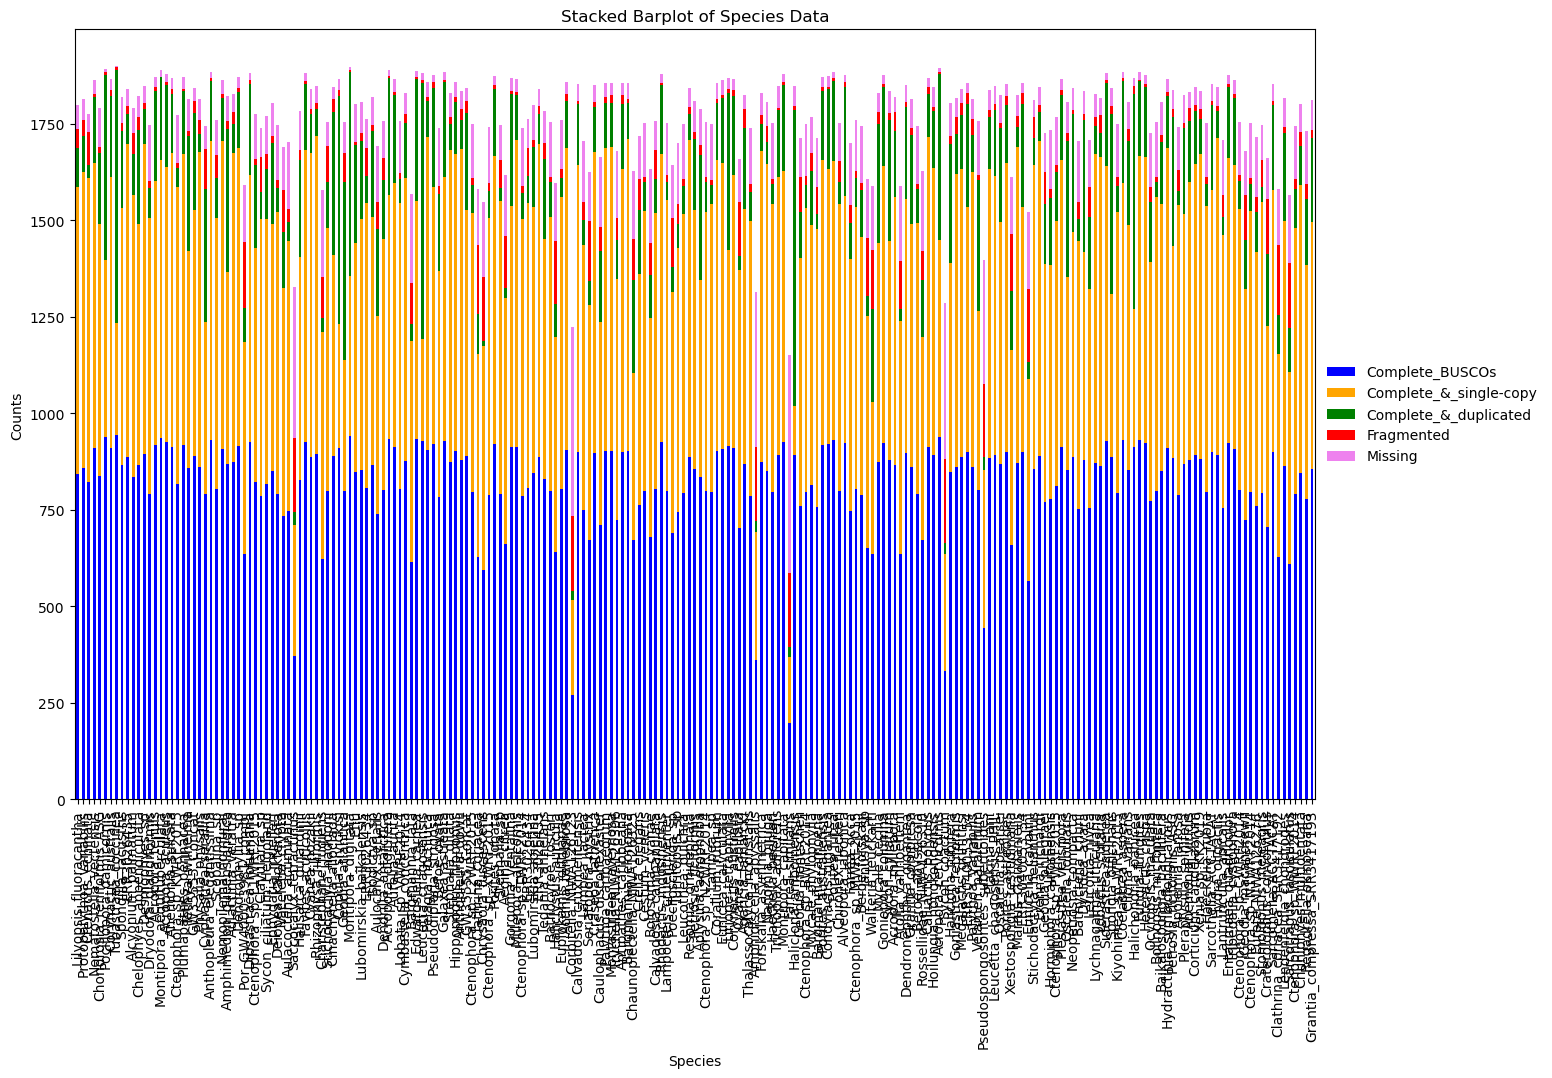

In [4]:
#Plot the stacked barplot
colors = ['blue', 'orange', 'green', 'red', 'violet']
ax = TransPi.plot(kind='bar', stacked=True, figsize=(16, 10), color=colors)
plt.title('Stacked Barplot of Species Data')
plt.xlabel('Species')
plt.ylabel('Counts')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)).set_frame_on(False)

# Show the plot
plt.show()

In [5]:
all_column_values = []
column_names = []
for column_name in TransPi.columns:
    column_names.append(column_name)
    column_values = TransPi[column_name].tolist()
    all_column_values.append(column_values)
# print(all_column_values)

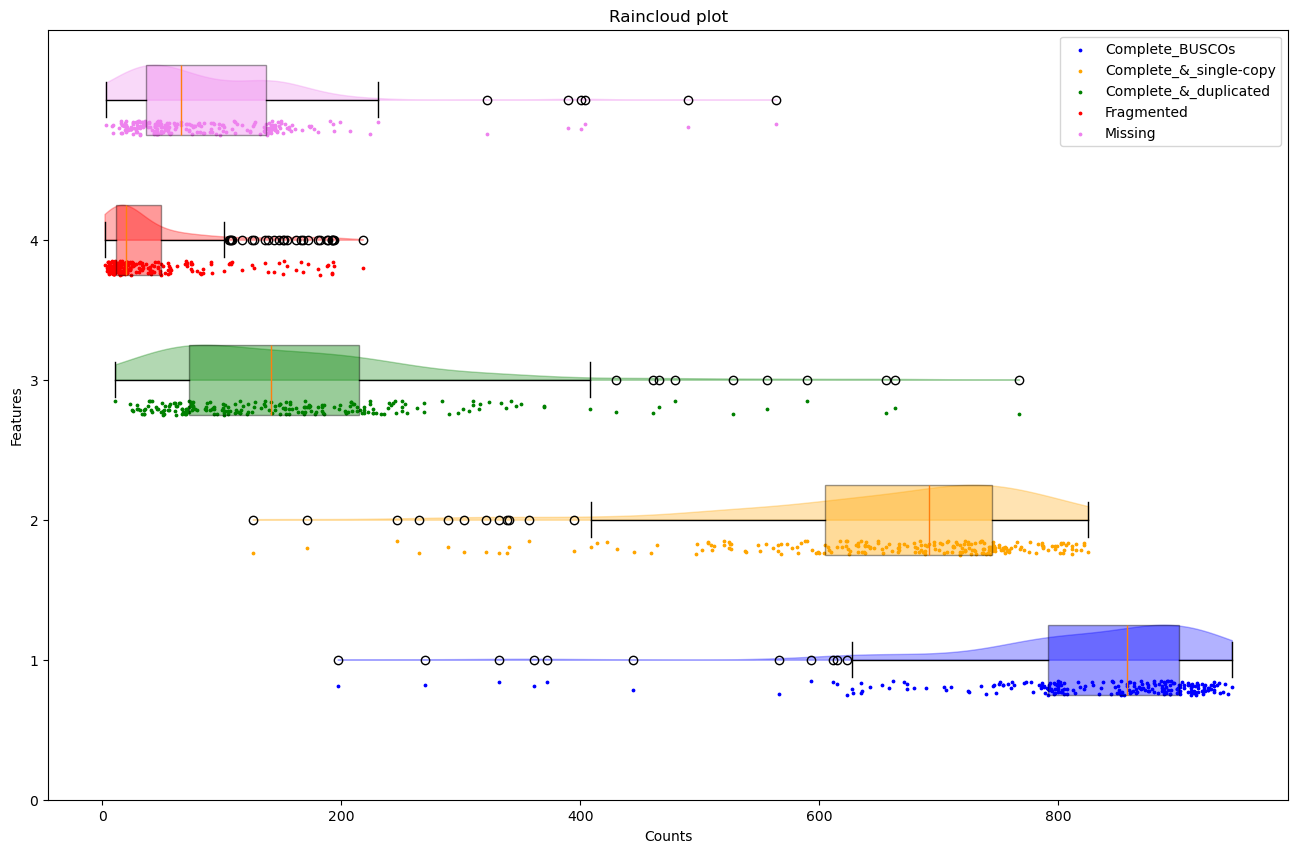

In [9]:
fig, ax = plt.subplots(figsize=(16, 10))
colors = ['blue', 'orange', 'green', 'red', 'violet']

# Boxplot data
bp = ax.boxplot(all_column_values, patch_artist = True, vert = False)

# Change to the desired color and add transparency
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.4)

# Violinplot data
vp = ax.violinplot(all_column_values, points=500, 
               showmeans=False, showextrema=False, showmedians=False, vert=False)

for idx, b in enumerate(vp['bodies']):
    # Get the center of the plot
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # Modify it so we only see the upper half of the violin plot
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
    # Change to the desired color
    b.set_color(colors[idx])

# Scatterplot data
for idx, features in enumerate(all_column_values):
    y = np.full(len(features), idx + .8)
    idxs = np.arange(len(y))
    out = y.astype(float)
    out.flat[idxs] += np.random.uniform(low=-.05, high=.05, size=len(idxs))
    y = out
    if len(features) != len(y):
        print('ERROR')
    plt.scatter(features, y, s=3, c=colors[idx], label=column_names[idx])

plt.yticks(np.arange(len(column_names)), range(len(column_names)))
plt.xlabel("Counts")
plt.ylabel("Features")
plt.title("Raincloud plot")
plt.legend()

plt.show()